In [83]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
data_path = "../data/with_stock_data.csv"
frame = pd.read_csv(data_path)
frame.columns

Index(['name', 'domain', 'year founded', 'industry', 'size range', 'city',
       ' state', 'country', ' linkedin url', 'current employee estimate',
       'total employee estimate', 'Score', 'reviews', 'salaries', 'interviews',
       'KMT', 'market_cap', 'enterprise_value', 'trailing_pe', 'forward_pe',
       'peg_ratio_5', 'price_sales', 'price_book', 'enterprise_value_revenue',
       'enterprise_value_ebitda', 'profit_margin', 'operating_margin',
       'return_on_assets', 'return_on_equity', 'revenue', 'revenue_per_share',
       'quarterly_revenue_share', 'gross_profit', 'ebitda',
       'net_income_avi_to_common', 'diluted_eps', 'quarterly_earnings_growth',
       'total_cash', 'total_cash_per_share', 'total_dept',
       'total_dept_per_equity', 'operating_cash_flow',
       'leveraged_free_cash_flow', 'stock_beta_3y', 'stock 52_week',
       'stock_sp500_52_week', 'stock_52_week_high', 'stock_52_week_low'],
      dtype='object')

In [85]:
def convertToClass(Y, k):
    return Y.apply(lambda elem : np.round(elem * k / 5))

# def convertToScore(Y, k):
#     return Y.apply(lambda elem : elem * 5 / k)

In [86]:
def convertToClass(Y, k):
    return np.apply_along_axis(lambda elem : np.round(elem * k / 5), 0, Y)

# Data Exploration

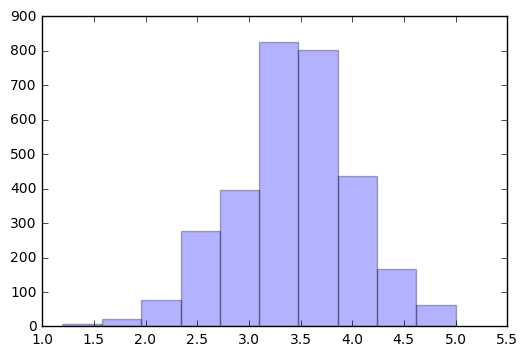

In [87]:
frame['Score']
plt.hist(frame['Score'], alpha=0.3)
plt.show()

# Feature Selection

In [88]:
# Pick Features
non_categorical_columns = ['year founded', 'current employee estimate', 'total employee estimate', 'reviews', 'salaries', 'interviews', 'market_cap', 'enterprise_value', 'trailing_pe', 'forward_pe', 'peg_ratio_5', 'price_sales', 'price_book', 'enterprise_value_revenue', 'enterprise_value_ebitda', 'profit_margin', 'operating_margin', 'return_on_assets', 'return_on_equity', 'revenue', 'revenue_per_share', 'quarterly_revenue_share', 'gross_profit', 'ebitda', 'net_income_avi_to_common', 'diluted_eps', 'quarterly_earnings_growth', 'total_cash', 'total_cash_per_share', 'total_dept', 'total_dept_per_equity', 'operating_cash_flow', 'leveraged_free_cash_flow', 'stock_beta_3y', 'stock 52_week', 'stock_sp500_52_week', 'stock_52_week_high', 'stock_52_week_low']
categorical_columns = ['industry', 'size range', 'city', ' state', 'country']
# non_categorical_columns = ['trailing_pe', 'leveraged_free_cash_flow', 'operating_cash_flow', 'total_dept_per_equity', 'ebitda', 'net_income_avi_to_common', 'forward_pe', 'total_cash']
# categorical_columns = ['city']

In [89]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})

# Linear Regression Random

In [8]:
# Normal CV with RANDOM data
X_random = pd.DataFrame({"rand" : np.random.random(Y.shape[0])})
x_train, x_test, y_train, y_test = train_test_split(X_random, Y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
predictions = np.clip(model.predict(x_test), 0, 5)
error = mean_squared_error(y_test, predictions)
print("Mean Squared Error:")
print(error)

# Training data
# print("Training Accuracy")
# pred = model.predict(X)
# print(sum(np.abs(pred - Y.values) <  0.5)/ Y.shape[0])
# y_pred = convertToClass(pred, 10)
# Y_scaled = convertToClass(Y, 10)
# confusion_m = confusion_matrix(Y_scaled, y_pred)
# print(confusion_m)

Mean Squared Error:
0.3301463723041901


# Linear Regression (L1 Regularization)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
reg = linear_model.Lasso(alpha=0.1)
reg.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [10]:
def convertToClass(Y, k):
    return np.apply_along_axis(lambda elem : np.round(elem * k / 5), 0, Y)

In [11]:
# Training Data
pred = np.clip(reg.predict(x_train), 0, 5).flatten()
print("Training Mean Square Error:")
print(mean_squared_error(y_train, pred))
print("Training Accuracy")
print(sum(np.abs(pred - y_train.values.flatten()) <  0.25)/ y_train.shape[0])
y_pred = convertToClass(pred, 10)
Y_scaled = convertToClass(y_train, 10)
confusion_m = confusion_matrix(Y_scaled, y_pred)
print(confusion_m)

Training Mean Square Error:
0.33495303519549147
Training Accuracy
0.36030906872712487
[[  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   7   0   0   0]
 [  0   0   0   0   0  55   0   0   0]
 [  0   0   0   1   0 254   0   0   0]
 [  0   0   0   0   4 609   0   0   0]
 [  0   0   0   0   5 829   4   1   0]
 [  0   0   0   0   2 491  10   3   0]
 [  0   0   0   0   2 146   2   1   0]
 [  0   0   0   0   0  31   0   0   1]]


In [12]:
# Test data: our own train / test split
predictions = np.clip(reg.predict(x_test),0, 5).flatten()
error = mean_squared_error(y_test, predictions)
print("Test Mean Square Error")
print(error)
print("Test Accuracy")
print(sum(np.abs(predictions - y_test.values.flatten()) <  0.25)/ y_test.shape[0])
print("Test Confusion Matrix")
y_pred = convertToClass(predictions, 10)
Y_scaled = convertToClass(y_test, 10)
confusion_m = confusion_matrix(Y_scaled, y_pred)
print(confusion_m)

Test Mean Square Error
0.32098600972062186
Test Accuracy
0.3642276422764228
Test Confusion Matrix
[[  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0  12   0   0   0]
 [  0   0   0   0   0  49   0   0   0]
 [  0   0   0   0   1 173   0   0   0]
 [  0   0   0   0   2 207   3   0   0]
 [  0   0   0   0   1 115   2   0   1]
 [  0   0   0   0   0  40   0   0   0]
 [  0   0   0   0   0   6   1   0   0]]


# Linear Regression (L2 Regularization)

In [101]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})

In [102]:
# Modeling
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
reg = Ridge(alpha=1.0, normalize=False)
reg.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [103]:
def convertToClass(Y, k):
    return np.apply_along_axis(lambda elem : np.round(elem * k / 5), 0, Y)

In [104]:
# Training Data
pred = np.clip(reg.predict(x_train), 0, 5).flatten()
print("Training Mean Square Error:")
print(mean_squared_error(y_train, pred))
print("Training Accuracy")
print(sum(np.abs(pred - y_train.values.flatten()) <  0.25)/ y_train.shape[0])
y_pred = convertToClass(pred, 10)
Y_scaled = convertToClass(y_train, 10)
confusion_m = confusion_matrix(Y_scaled, y_pred)
print(confusion_m)

Training Mean Square Error:
0.18660303547765014
Training Accuracy
0.5115900772671818
[[  0   0   1   0   1   0   0   0   0]
 [  0   0   0   4   1   0   0   0   0]
 [  0   0   0  22  20  12   0   0   0]
 [  0   0   0  21 145  80   2   0   0]
 [  0   0   0   4 304 304  10   0   0]
 [  0   0   0   0 108 695  48   0   0]
 [  0   0   0   0  30 327 142   1   0]
 [  0   0   0   0   2  72  62   9   0]
 [  0   0   0   0   0  13  11   7   1]]


In [105]:
# Test data: our own train / test split
predictions = np.clip(reg.predict(x_test),0, 5).flatten()
error = mean_squared_error(y_test, predictions)
print("Test Mean Square Error")
print(error)
print("Test Accuracy")
print(sum(np.abs(predictions - y_test.values.flatten()) <  0.25)/ y_test.shape[0])
print("Test Confusion Matrix")
y_pred = convertToClass(predictions, 10)
Y_scaled = convertToClass(y_test, 10)
confusion_m = confusion_matrix(Y_scaled, y_pred)
print(confusion_m)

Test Mean Square Error
0.396556189371224
Test Accuracy
0.3073170731707317
Test Confusion Matrix
[[  0   0   0   0   3   0   0   0]
 [  0   0   0   4   8   1   0   0]
 [  0   0   3  16  35   2   0   0]
 [  0   0   2  45 108  10   0   0]
 [  0   0   4  44 124  26   2   0]
 [  0   0   3  28  80  13   1   0]
 [  0   0   0  10  31   5   0   0]
 [  0   0   0   2   3   2   0   0]]


# Linear Regression

In [106]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})

In [107]:
# Modeling
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
reg = LinearRegression().fit(x_train, y_train)

In [108]:
def convertToClass(Y, k):
    return np.apply_along_axis(lambda elem : np.round(elem * k / 5), 0, Y)

In [109]:
# Training Data
pred = np.clip(reg.predict(x_train), 0, 5).flatten()
print("Training Mean Square Error:")
print(mean_squared_error(y_train, pred))
print("Training Accuracy")
print(sum(np.abs(pred - y_train.values.flatten()) <  0.25)/ y_train.shape[0])
y_pred = convertToClass(pred, 10)
Y_scaled = convertToClass(y_train, 10)
confusion_m = confusion_matrix(Y_scaled, y_pred)
print(confusion_m)

Training Mean Square Error:
0.17022880305921104
Training Accuracy
0.5860105734038227
[[  0   1   0   0   1   0   0   0   0]
 [  0   1   3   2   1   0   0   0   0]
 [  0   0  16   9  18   7   0   0   0]
 [  0   0   6  88  74  67   4   0   0]
 [  0   0   0  31 320 250  23   0   0]
 [  0   0   0   6 151 591  91   3   0]
 [  0   0   0   1  30 249 217  11   0]
 [  0   0   0   0   3  60  42  49   2]
 [  0   0   0   0   0  10   5   3  13]]


In [110]:
# Test data: our own train / test split
predictions = np.clip(reg.predict(x_test),0, 5).flatten()
error = mean_squared_error(y_test, predictions)
print("Test Mean Square Error")
print(error)
print("Test Accuracy")
print(sum(np.abs(predictions - y_test.values.flatten()) <  0.25)/ y_test.shape[0])
print("Test Confusion Matrix")
y_pred = convertToClass(predictions, 10)
Y_scaled = convertToClass(y_test, 10)
confusion_m = confusion_matrix(Y_scaled, y_pred)
print(confusion_m)

Test Mean Square Error
0.6095144411366719
Test Accuracy
0.2764227642276423
Test Confusion Matrix
[[  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0]
 [  0   0   0   1   8   6   1   0   1]
 [  2   0   0   1  19  31   7   2   3]
 [  1   0   3  10  42  81  16   6   4]
 [  2   1   2  11  51 107  27   4   4]
 [  0   0   2   2  33  56  21   3   0]
 [  0   0   0   3  10  16   4   2   0]
 [  0   0   0   1   1   5   1   0   0]]


# Support Vector Regression

In [111]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})

In [112]:
# Modeling
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
reg = SVR().fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [113]:
def convertToClass(Y, k):
    return np.apply_along_axis(lambda elem : np.round(elem * k / 5), 0, Y)

In [114]:
# Training Data
pred = np.clip(reg.predict(x_train), 0, 5).flatten()
print("Training Mean Square Error:")
print(mean_squared_error(y_train, pred))
print("Training Accuracy")
print(sum(np.abs(pred - y_train.values.flatten()) <  0.25)/ y_train.shape[0])
y_pred = convertToClass(pred, 10)
Y_scaled = convertToClass(y_train, 10)
confusion_m = confusion_matrix(Y_scaled, y_pred)
print(confusion_m)

Training Mean Square Error:
0.034695133925602646
Training Accuracy
0.936966246441643
[[  0   0   0   1   0   0   0   0   0]
 [  0   0   0   8   0   0   0   0   0]
 [  0   0   0  55   1   0   0   0   0]
 [  0   0   0 177  69   0   0   0   0]
 [  0   0   0  11 458 164   4   2   0]
 [  0   0   0   8   2 816   0  14   0]
 [  0   0   0   1   2 140 344   4   0]
 [  0   0   0   0   0   0  40 106   0]
 [  0   0   0   0   0   0   0  32   0]]


In [115]:
# Test data: our own train / test split
predictions = np.clip(reg.predict(x_test),0, 5).flatten()
error = mean_squared_error(y_test, predictions)
print("Test Mean Square Error")
print(error)
print("Test Accuracy")
print(sum(np.abs(predictions - y_test.values.flatten()) <  0.25)/ y_test.shape[0])
print("Test Confusion Matrix")
y_pred = convertToClass(predictions, 10)
Y_scaled = convertToClass(y_test, 10)
confusion_m = confusion_matrix(Y_scaled, y_pred)
print(confusion_m)

Test Mean Square Error
0.33872959633143634
Test Accuracy
0.35609756097560974
Test Confusion Matrix
[[  0   0   0   0   1   0   0   0]
 [  0   0   0   0  11   0   0   0]
 [  0   0   0   0  58   0   0   0]
 [  0   0   0   1 147   0   0   0]
 [  0   0   0   0 211   0   0   0]
 [  0   0   0   0 134   0   0   0]
 [  0   0   0   1  44   0   0   0]
 [  0   0   0   0   7   0   0   0]]


# Softmax

In [116]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})
k = 10
Y = convertToClass(Y, k)
# Y["y"].value_counts()

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
# Training data
y_pred = clf.predict(x_train)
confusion_m = confusion_matrix(y_train, y_pred)
training_accuracy = clf.score(x_train, y_train)
print(training_accuracy)
print(confusion_m)

0.31720211468076454
[[  0   0   0   0   0   0   0   1   0]
 [  0   0   0   0   1   6   1   0   0]
 [  0   0   0   0   5  37   8   1   0]
 [  0   0   0   0  37 181  22   4   0]
 [  2   0   0   0  59 485  82  14   0]
 [  0   1   0   1  91 624 106  18   0]
 [  0   0   0   0  53 329  95   8   0]
 [  0   0   0   0  27  99  27   2   0]
 [  1   0   0   0   5  21   4   1   0]]


In [29]:
# Testing data
y_pred = clf.predict(x_test)
confusion_m = confusion_matrix(y_test, y_pred)
test_accuracy = clf.score(x_test, y_test)
print(test_accuracy)
print(confusion_m)

0.3203252032520325
[[  0   0   0   1   0   0   0   0]
 [  0   0   0   1  13   2   0   0]
 [  0   0   0   6  46   6   2   0]
 [  0   0   0  15 118   9   3   0]
 [  0   0   0  23 156  27   4   0]
 [  0   0   0  14 101  24   1   0]
 [  0   0   0   6  22   6   2   0]
 [  0   0   0   3   3   1   0   0]]


# Support Vector Machine, Kernel = rbf

In [30]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})
k = 10
Y = convertToClass(Y, k)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
clf = SVC(gamma = 'auto', kernel='rbf', C=.8)
clf.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
# Training data
y_pred = clf.predict(x_train)
confusion_m = confusion_matrix(y_train, y_pred)
training_accuracy = clf.score(x_train, y_train)
print(training_accuracy)
print(confusion_m)

0.9015860105734038
[[  0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0   7   0   0   0]
 [  0   0   0   0   0  56   0   0   0]
 [  0   0   0 232   0   2   0   0   0]
 [  0   0   0   0 623   0   0   0   0]
 [  0   0   0   0   0 857   0   0   0]
 [  0   0   0   0   0   2 503   0   0]
 [  0   0   0   0   0 144   0   2   0]
 [  0   0   0   0   0  29   0   0   0]]


In [33]:
# Testing data
y_pred = clf.predict(x_test)
confusion_m = confusion_matrix(y_test, y_pred)
test_accuracy = clf.score(x_test, y_test)
print(test_accuracy)
print(confusion_m)

0.3154471544715447
[[  0   0   0   0   1   0   0   0]
 [  0   0   0   0  11   0   0   0]
 [  0   0   0   0  70   0   0   0]
 [  0   0   0   0 164   0   0   0]
 [  0   0   0   0 194   0   0   0]
 [  0   0   0   0 120   0   0   0]
 [  0   0   0   0  45   0   0   0]
 [  0   0   0   0  10   0   0   0]]


# Support Vector Machine, Kernel = linear

In [34]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})
k = 10
Y = convertToClass(Y, k)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
clf = SVC(gamma = 'auto', kernel='linear', C=1, max_iter=5000)
clf.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda/lib/python3.5/site-packages/sklearn/svm/base.py:220: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=5000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
# Training data
y_pred = clf.predict(x_train)
confusion_m = confusion_matrix(y_train, y_pred)
training_accuracy = clf.score(x_train, y_train)
print(training_accuracy)
print(confusion_m)

0.11793411956079707
[[  0   0   0   2   0   0   0   0   0]
 [  0   0   0   7   1   0   0   0   0]
 [  0   0   0  39   0   1   1   1   4]
 [  0   2   1 212   9   4   6   3   8]
 [  0   9  12 516  31   7  22  11  10]
 [  0  15  18 649  58  13  39  22  20]
 [  0   7  23 395  28   3  31  18  14]
 [  0   2   3 128   7   2   3   1   8]
 [  0   0   2  28   0   0   1   0   2]]


In [37]:
# Testing data
y_pred = clf.predict(x_test)
confusion_m = confusion_matrix(y_test, y_pred)
test_accuracy = clf.score(x_test, y_test)
print(test_accuracy)
print(confusion_m)

0.11707317073170732
[[  0   0   0   0   0   0   0   0]
 [  0   0  17   4   0   0   0   0]
 [  1   1  53   1   0   2   0   1]
 [  2   1 145  10   1   3   2   5]
 [  5   9 166  18   1  12   4   2]
 [  2   4  82   7   0   6   4   1]
 [  0   0  29   3   1   3   1   0]
 [  0   0   5   0   0   0   0   1]]


# Decision Trees

In [129]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})
k = 10
Y = convertToClass(Y, k)

In [130]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
clf = tree.DecisionTreeClassifier(max_depth = 15)
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [131]:
# Training data
y_pred = clf.predict(x_train)
confusion_m = confusion_matrix(y_train, y_pred)
training_accuracy = clf.score(x_train, y_train)
print(training_accuracy)
print(confusion_m)

0.7710451403009353
[[  1   0   0   0   0   0   0   0   0]
 [  0   2   1   0   0   3   0   2   0]
 [  0   0  32   0  11  11   1   1   0]
 [  0   0   2 134  15  70   1   2   0]
 [  0   0   1  12 487 136   6   1   0]
 [  0   0   1  15  28 796  14   2   0]
 [  0   0   0  12  25 118 335   1   0]
 [  0   0   1   5  17  41   1  81   0]
 [  0   0   1   1   0   4   0   0  28]]


In [132]:
# Testing data
y_pred = clf.predict(x_test)
confusion_m = confusion_matrix(y_test, y_pred)
test_accuracy = clf.score(x_test, y_test)
print(test_accuracy)
print(confusion_m)

0.28292682926829266
[[  0   0   0   1   0   0   0   0]
 [  0   0   0   2   7   2   0   0]
 [  0   0   2  30  37   9   1   1]
 [  0   3  16  33  62  27   3   0]
 [  0   1   8  42 108  32   4   0]
 [  0   2   9  28  57  28   8   2]
 [  0   1   5  13  14   9   3   0]
 [  0   0   1   1   2   1   0   0]]


# Linear Discriminant Analysis

In [42]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})
k = 10
Y = convertToClass(Y, k)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
clf = LinearDiscriminantAnalysis()
clf.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [44]:
# Training data
y_pred = clf.predict(x_train)
confusion_m = confusion_matrix(y_train, y_pred)
training_accuracy = clf.score(x_train, y_train)
print(training_accuracy)
print(confusion_m)

0.7002846685644571
[[  1   0   0   0   0   1   0   0   0]
 [  0   6   0   0   1   0   0   0   0]
 [  0   0  39   1   4   4   7   1   0]
 [  0   0   3 150  30  24  23   3   0]
 [  0   0   2  17 486  63  65   8   1]
 [  0   1   4  13 118 546 123  21   5]
 [  0   0   1  10  49  50 393   7   1]
 [  0   0   0   1  17  19  25  85   0]
 [  0   0   0   0   4   5   5   0  16]]


In [45]:
# Testing data
y_pred = clf.predict(x_test)
confusion_m = confusion_matrix(y_test, y_pred)
test_accuracy = clf.score(x_test, y_test)
print(test_accuracy)
print(confusion_m)

0.26991869918699185
[[ 0  0  0  0  1  0  0  0]
 [ 0  0  0  3  4  2  2  0]
 [ 0  1  7 18 20 19  6  0]
 [ 0 10 10 41 41 30 13  0]
 [ 0 10 12 56 68 55 18  1]
 [ 0  3  6 26 27 43  9  0]
 [ 0  3  3 13  6 12  7  0]
 [ 0  0  1  2  3  3  0  0]]


# QDA

In [46]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})
k = 10
Y = convertToClass(Y, k)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
clf = QuadraticDiscriminantAnalysis()
clf.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [48]:
# Training data
y_pred = clf.predict(x_train)
confusion_m = confusion_matrix(y_train, y_pred)
training_accuracy = clf.score(x_train, y_train)
print(training_accuracy)
print(confusion_m)

0.47132980886539244
[[  1   0   0   0   0   1   0   0   0]
 [  0   3   0   0   1   2   0   0   0]
 [  0   0  19   1   2  17   1   5   2]
 [  0   0   0 142   4  93   2   0   0]
 [  0   0 146   3 112 231  25  85  35]
 [  0   0 109   2   3 614   8  87  17]
 [  0   0  44   4   4 202 204  35   5]
 [  0   0  26   5   5  64   7  50   5]
 [  0   0   0   0   0  12   0   0  14]]


In [49]:
# Testing data
y_pred = clf.predict(x_test)
confusion_m = confusion_matrix(y_test, y_pred)
test_accuracy = clf.score(x_test, y_test)
print(test_accuracy)
print(confusion_m)

0.18048780487804877
[[ 0  1  0  0  0  0  0  1]
 [ 0  6  0  1  4  0  6  3]
 [ 0 17  1  2 22  1 13  7]
 [ 0 50  4  7 56  5 22  6]
 [ 0 52  5  4 86  7 42 15]
 [ 0 37  1  1 54  6 21  7]
 [ 0  5  1  0 15  1  5  2]
 [ 0  2  0  0  7  0  4  0]]


# K Nearest Neighbors

In [141]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})
k = 10
Y = convertToClass(Y, k)

In [142]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [143]:
# Training data
y_pred = neigh.predict(x_train)
confusion_m = confusion_matrix(y_train, y_pred)
training_accuracy = neigh.score(x_train, y_train)
print(training_accuracy)
print(confusion_m)

0.3867425782838552
[[  0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   2   4   1   0   0]
 [  0   0   0   1  19  23   7   0   0]
 [  0   0   0  16  77 125  35   0   0]
 [  0   0   0  17 280 274  64   0   0]
 [  0   0   0  16 200 506  96   0   0]
 [  0   0   0  12 134 220 149   0   0]
 [  0   0   0   1  45  64  38   0   0]
 [  0   0   0   0   8  19   4   0   0]]


In [144]:
# Testing data
y_pred = neigh.predict(x_test)
confusion_m = confusion_matrix(y_test, y_pred)
test_accuracy = neigh.score(x_test, y_test)
print(test_accuracy)
print(confusion_m)

0.3056910569105691
[[  0   0   0   1   0   0   0   0]
 [  0   0   1   6   8   2   0   0]
 [  0   0   0  15  25  11   0   0]
 [  0   0   4  48  79  21   0   0]
 [  0   0   5  71 118  39   0   0]
 [  0   0   2  29  57  22   0   0]
 [  0   0   1  12  21   9   0   0]
 [  0   0   0   2   4   2   0   0]]


# PCA

In [147]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})
k = 10
Y = convertToClass(Y, k)

In [148]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
pca = PCA(n_components=5)
X_new = pca.fit_transform(x_train)

In [149]:
clf = SVC(gamma = 'auto', kernel='rbf', C=.8)
clf.fit(X_new, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [150]:
# Training data
y_pred = clf.predict(X_new)
confusion_m = confusion_matrix(y_train, y_pred)
training_accuracy = clf.score(X_new, y_train)
print(training_accuracy)
print(confusion_m)

0.8271655144367629
[[  0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   1   4   1   0   0]
 [  0   0   0   2   6  49   2   0   0]
 [  0   0   0 199  14  21   6   0   0]
 [  0   0   0   1 587  46   2   0   0]
 [  0   0   0   0  14 821   3   0   0]
 [  0   0   0   0  32  40 427   0   0]
 [  0   0   0   5  13 121   9   0   0]
 [  0   0   0   0   5  25   1   0   0]]


In [151]:
# Testing data
X_new_test = pca.transform(x_test)
y_pred = clf.predict(X_new_test)
confusion_m = confusion_matrix(y_test, y_pred)
test_accuracy = clf.score(X_new_test, y_test)
print(test_accuracy)
print(confusion_m)

0.3170731707317073
[[  0   0   0   0   2   0   0   0]
 [  0   0   0   1   6   1   0   0]
 [  0   0   1   4  55   4   0   0]
 [  0   0  10  11 121   9   0   0]
 [  0   0   7  21 174  11   0   0]
 [  0   0   2   7 108   9   0   0]
 [  0   0   0   4  35   4   0   0]
 [  0   0   0   1   7   0   0   0]]


# Neural Networks

In [212]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})
k = 10
Y = convertToClass(Y, k)

In [213]:
from sklearn.neural_network import MLPClassifier
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100, 100, 100), random_state=1)
clf.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [214]:
# Training data
y_pred = clf.predict(x_train)
confusion_m = confusion_matrix(y_train, y_pred)
training_accuracy = clf.score(x_train, y_train)
print(training_accuracy)
print(confusion_m)

0.054087027246848315
[[  1   1   0   0   0   0   0   0   0]
 [  2   1   4   0   0   0   0   0   0]
 [ 16  15  14   0   0   3   1   6   0]
 [ 66  70  53   0   0  28   9  14   0]
 [178 165 131   4   0  79  28  31   0]
 [294 237 158   6   0  90  29  44   0]
 [191 123  91   1   0  55  17  24   0]
 [ 46  30  35   0   0  24   3  10   0]
 [  7   9   7   0   0   2   3   3   0]]


In [215]:
# Testing data
y_pred = clf.predict(x_test)
confusion_m = confusion_matrix(y_test, y_pred)
test_accuracy = clf.score(x_test, y_test)
print(test_accuracy)
print(confusion_m)

0.05040650406504065
[[ 0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0]
 [ 1  3  5  0  0  0  0  3  0]
 [20 14 15  0  0 10  1  4  0]
 [57 50 33  0  0 14  9  8  0]
 [62 52 36  1  0 19 13 10  0]
 [50 25 23  1  0 12  6  6  0]
 [15 11 12  0  0  4  0  1  0]
 [ 4  1  1  0  0  1  0  1  0]]
